In [2]:
%config Completer.use_jedi = False

In [3]:
from tessellation import Tessellation

# Create Tessllation Object

In [4]:
los_angeles= Tessellation('Los Angeles')

In [5]:
los_angeles_poly=los_angeles.get_polygon()

In [6]:
los_angeles_poly

,osm_id,geometry
0,207359,"POLYGON ((-118.66818 34.18771, -118.66817 34.1..."


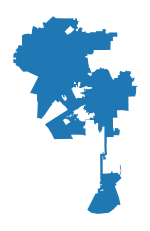

In [7]:
los_angeles_poly.plot().set_axis_off();

# Squares and Hexagons

/home/siavash/anaconda3/envs/geospatial/lib/python3.6/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


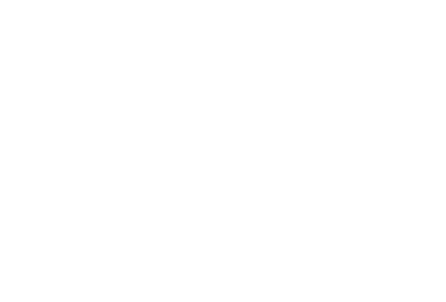

In [8]:
los_angeles_hex=los_angeles.hexagons(8)
los_angeles_hex.plot(lw=1, edgecolor='w').set_axis_off();

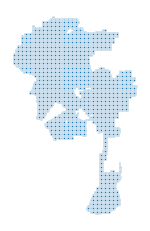

In [10]:
los_angeles_sqr=los_angeles.squares(16)
los_angeles_sqr.plot(lw=0.5, edgecolor='w').set_axis_off();

# Voronoi

In [11]:
los_angeles_voronoi= los_angeles.voronoi(cluster_algo='k-means',
                        poi_categories=['public_transport'],
                        timeout=60,
                        n_polygons=500,
                        verbose=True)

Getting data from OSM...


100% (4692 of 4692) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


Creating POI DataFrame...
Cleaning POI DataFrame...
K-Means Clustering...
Creating Voronoi polygons...


483 polygons


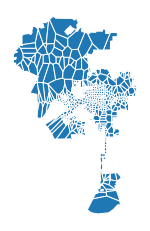

In [12]:
los_angeles_voronoi.plot(lw=1, edgecolor='w').set_axis_off();
print(len(los_angeles_voronoi), 'polygons')

In [14]:
los_angeles_voronoi= los_angeles.voronoi(cluster_algo='k-means',
                        poi_categories=['shop'],
                        timeout=60,
                        n_polygons=100,
                        verbose=True)

Getting data from OSM...


100% (4394 of 4394) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


Creating POI DataFrame...
Cleaning POI DataFrame...
K-Means Clustering...
Creating Voronoi polygons...


100 polygons


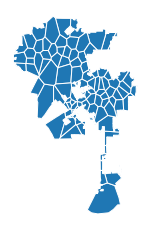

In [15]:
los_angeles_voronoi.plot(lw=1, edgecolor='w').set_axis_off();
print(len(los_angeles_voronoi), 'polygons')

In [16]:
los_angeles.get_poi_data().sample(5)

,type,geometry,tags,center_latitude,center_longitude,public_transport,shop
331,node,"[{'lat': 34.0650258, 'lon': -118.248924}]","{'bench': 'yes', 'bus': 'yes', 'highway': 'bus...",34.065026,-118.248924,True,False
1025,node,"[{'lat': 34.0264383, 'lon': -118.3725319}]","{'light_rail': 'yes', 'name': 'La Cienega/Jeff...",34.026438,-118.372532,True,False
280,node,"[{'lat': 34.0662399, 'lon': -118.2786457}]","{'bus': 'yes', 'highway': 'bus_stop', 'name': ...",34.066240,-118.278646,True,False
3317,node,"[{'lat': 33.9800314, 'lon': -118.407901}]","{'bench': 'no', 'bus': 'yes', 'highway': 'bus_...",33.980031,-118.407901,True,False
4116,node,"[{'lat': 34.0257721, 'lon': -118.3352412}]","{'bench': 'yes', 'bus': 'yes', 'highway': 'bus...",34.025772,-118.335241,True,False


In [17]:
los_angeles_voronoi_hdbscan= los_angeles.voronoi(cluster_algo='hdbscan',
                                poi_categories=['public_transport'],
                                timeout=30,
                                min_cluster_size=15,
                                verbose=True)

HDBSCAN Clustering... This can take a while...
Creating Voronoi polygons...


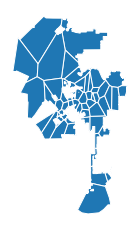

In [18]:
los_angeles_voronoi_hdbscan.plot(lw=1, edgecolor='w').set_axis_off();